In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import glob
import pandas as pd

In [63]:
project_dir="results/projects/240117llama7b_10"
#project_dir="results/projects/240118llama7b_100"
#project_dir="results/projects/240117llama7b"
project_dir="results/projects/240119mixtral_self_reasoning_10/"
project_dir="results/projects/240122llama2_7b_self_reasoning_10/"


In [64]:
result_list=[]

def load_data(project_dir,prefix="test_"):
    for path in glob.glob(f"{project_dir}/eval/{prefix}*.json"):
        #load eval data
        with open(path,"r") as f:
            d=(json.load(f))

        generation=path.split("/")[-1].split("_")[1]
        generation=int(generation)

        mode=path.split("/")[-1].split("_")[0]
        d["generation"]=generation
        d["mode"]=mode

        #count self_reasoning data
        self_reasoning_records=0
        for gen in range(0,generation+1):
            self_reasoning_records+=len(glob.glob(f"{project_dir}/self_reasoning/{gen}_*.json"))

        d["Self-reasoning records"]=self_reasoning_records
        result_list.append(d)

    return result_list

#train_result_list=load_data(project_dir,"train_")
#test_result_list=load_data(project_dir,"test_")
result_list=load_data(project_dir,"")

In [65]:
result_df=pd.DataFrame(result_list)
result_df

,MSE,MAE,R2,Answer ratio,plot,generation,mode,Self-reasoning records
0,11041.525650,77.037000,-0.328802,1.00,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",0,test,130
1,15669.010052,102.994792,-0.944671,0.96,[{'name': '6-[bis(5-ethylfuran-2-yl)methyl]-7-...,2,train,264
2,18741.419427,108.515625,-1.211035,0.96,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",1,test,250
3,25960.630312,128.218750,-0.472776,0.80,"[{'name': 'cyclobutane, methylene-', 'smiles':...",0,train,130
4,17886.322296,104.982653,-1.125747,0.98,"[{'name': '2-phenylacetanilide', 'smiles': 'O=...",2,test,264
5,12760.670867,79.417347,-0.146051,0.98,"[{'name': '1-fluoropentane', 'smiles': 'CCCCCF...",1,train,250


<Axes: xlabel='generation', ylabel='MSE'>

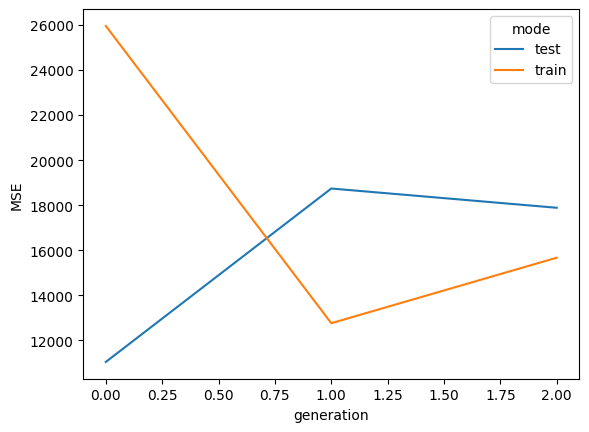

In [66]:
sns.lineplot(x="generation",y="MSE",hue="mode",data=result_df)

#plt.ylim(4000,12000)

<Axes: xlabel='Self-reasoning records', ylabel='MSE'>

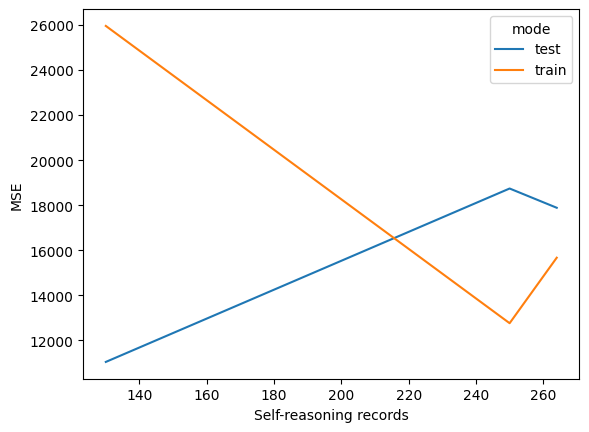

In [67]:

sns.lineplot(x="Self-reasoning records",y="MSE",hue="mode",data=result_df)

<Axes: xlabel='generation', ylabel='Self-reasoning records'>

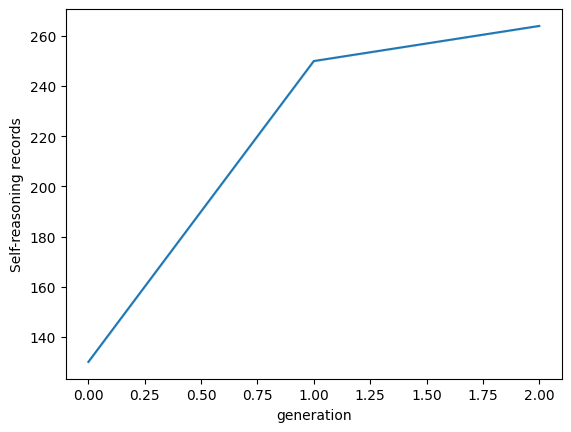

In [68]:

sns.lineplot(x="generation",y="Self-reasoning records",data=result_df)